In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

In [5]:
class MemoryNet:
    def __init__(self, size):
        plt.close('all')
        
        self.size = size
        self.start = np.full((size, size), -1)
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.out = widgets.Output()
        self.button = widgets.Button(description="Run Recognition")
        self.button.on_click(lambda b: self.recall(6))
        #self.button.on_click(self.show_array)

        A_mem = np.loadtxt("memory_pattern_A.csv", delimiter=",", dtype=int)
        B_mem = np.loadtxt("memory_pattern_B.csv", delimiter=",", dtype=int)
        C_mem = np.loadtxt("memory_pattern_C.csv", delimiter=",", dtype=int)
        A = A_mem.flatten()
        B = B_mem.flatten()
        C = C_mem.flatten()

        # Compute interaction matrix using Hebbian rule (sum of outer products)
        W = np.outer(A, A) + np.outer(B, B) + np.outer(C, C)
        np.fill_diagonal(W, 0)  # no self-connections

        # Save for use in energy calculation
        self.interaction = W
        
        # Drawing state
        self.is_drawing = False
        self.last_cell = None  # To avoid toggling the same cell multiple times per drag

        # Connect events
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)

        self.update_plot()

    def on_press(self, event):
        if event.inaxes == self.ax:
            self.is_drawing = True
            self.toggle_or_draw(event, toggle=True)

    def on_motion(self, event):
        if self.is_drawing and event.inaxes == self.ax:
            self.toggle_or_draw(event, toggle=False)

    def on_release(self, event):
        self.is_drawing = False
        self.last_cell = None

    def toggle_or_draw(self, event, toggle):
        x = int(round(event.xdata))
        y = int(round(event.ydata))
        if 0 <= x < self.size and 0 <= y < self.size:
            i, j = self.size - 1 - y, x
            cell = (i, j)
            if toggle:
                # Click toggles between 1 and -1
                self.start[i, j] = -1 if self.start[i, j] == 1 else 1
                self.update_plot()
            else:
                # Drag sets to 1 (only if it's not already and not repeated)
                if cell != self.last_cell and self.start[i, j] != 1:
                    self.start[i, j] = 1
                    self.update_plot()
                    self.last_cell = cell

    def update_plot(self):
        self.ax.clear()
        y, x = np.where(self.start == 1)
        self.ax.scatter(x, self.size - 1 - y, color='black', marker='o')

        self.ax.set_xlim(-0.5, self.size - 0.5)
        self.ax.set_ylim(-0.5, self.size - 0.5)
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.ax.set_aspect('equal')
        for spine in self.ax.spines.values():
            spine.set_visible(False)
        self.ax.grid(True)
        self.fig.canvas.draw_idle()

    def show_array(self, _=None):
        with self.out:
            clear_output(wait=True)
            display(self.button)
            print("Memory Array (1s = dots, -1s = empty):\n")
            print(self.start)
            
    def EnergyValue(self, matrix):

        state = matrix.flatten()
        return -(1/3) * np.dot(state, np.dot(self.interaction, state))

        
    def recall(self, iterations):
        state = self.start.flatten()
        for _ in range(iterations):
            indices = list(range(len(state)))
            random.shuffle(indices)
            for idx in indices:
                delta_E = 2 * state[idx] * np.dot(self.interaction[idx], state)
                if delta_E < 0:
                    state[idx] *= -1
        self.start = state.reshape((self.size, self.size))
        self.update_plot()
                    
    def interface(self):
        layout = widgets.VBox([
            self.button,  # Top button
            self.out  # And any output below that
        ])
        display(layout)

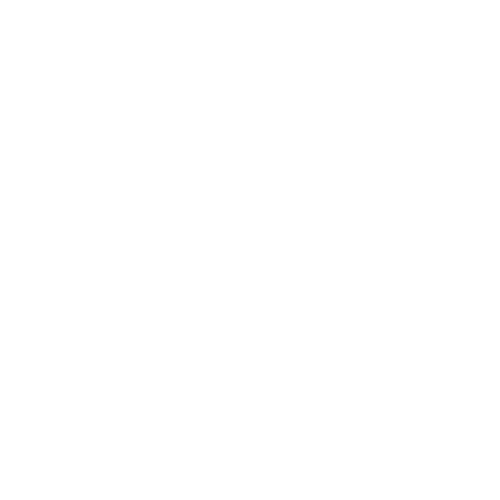

In [14]:
%matplotlib widget
test = MemoryNet(10)
test.interface()

In [15]:
choice = [i for i in range(1,4)]
print(choice)

[1, 2, 3]
